In [1]:
import ROOT
import array

Welcome to JupyROOT 6.24/00


# define the random variable

In [2]:
mll   = ROOT.RooRealVar("mll", "mll", 60, 120)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



# define the parameters of a Breit Wigner PDF

In [3]:
m0    = ROOT.RooRealVar("m0", "m0", 90)
Gamma = ROOT.RooRealVar("gamma", "gamma", 2.5)
bw    = ROOT.RooBreitWigner("bw", "bw", mll, m0, Gamma)

# generate a 100 events dataset

In [4]:
dataset = bw.generate(mll, 100)

# define a new PDF along with new parameters for the fit

In [5]:
m0fit    = ROOT.RooRealVar("m0fit", "m0fit", 60, 120)
Gammafit = ROOT.RooRealVar("gammafir", "gammafit", 0, 10)
bwfit    = ROOT.RooBreitWigner("bwfit", "bwfit", mll, m0fit, Gammafit)

# fit  to the data

In [6]:
bwfit.fitTo(dataset, ROOT.RooFit.Minos(ROOT.kTRUE))
m0fitRes = m0fit.getVal()
m0fitresDo = m0fit.getVal()+m0fit.getAsymErrorLo()
m0fitresUp = m0fit.getVal()+m0fit.getAsymErrorHi()

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 gammafir     5.00000e+00  1.00000e+00    0.00000e+00  1.00000e+01
     2 m0fit        9.00000e+01  6.00000e+00    6.00000e+01  1.20000e+02
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=265.683 FROM MIGRAD    STATUS=INITIATE        6 CALLS           7 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX 

# plot the result

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


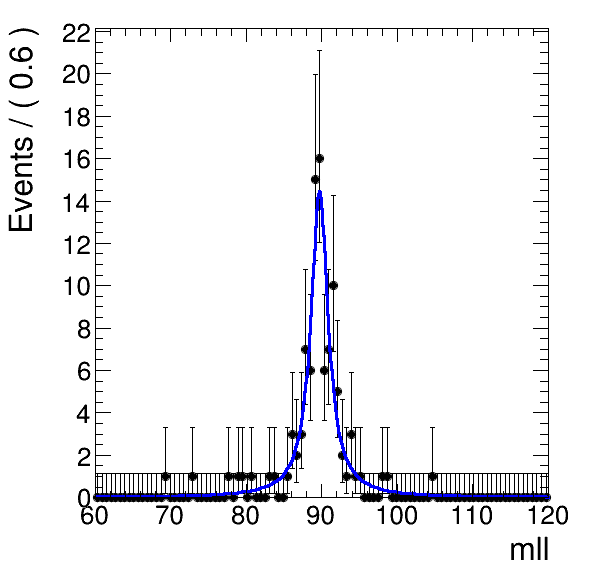

In [7]:
frame_mll = mll.frame()
dataset.plotOn(frame_mll)
bwfit.plotOn(frame_mll)
frame_mll.Draw()
ROOT.gPad.Draw()

# redo the fit instantiating the likelihood by hand

In [8]:
nll = bwfit.createNLL(dataset)
ROOT.RooMinuit(nll).migrad()
minNLL=nll.getVal()

 **********
 **   13 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=256.328 FROM MIGRAD    STATUS=INITIATE        4 CALLS           5 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX       
  EXT PARAMETER               CURRENT GUESS       STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  gammafir     2.72478e+00   3.88586e-01   8.74759e-02  -2.25434e-03
   2  m0fit        8.97041e+01   1.92694e-01   6.42348e-03  -2.83420e-02
                               ERR DEF= 0.5
 MIGRAD MINIMIZATION HAS CONVERGED.
 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.
 COVARIANCE MATRIX CALCULATED SUCCESSFULLY
 FCN=256.328 FROM MIGRAD    STATUS=CONVERGED      24 CALLS          25 TOTAL
                     EDM=6.1549e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER   

# draw the nll per points around the minimum

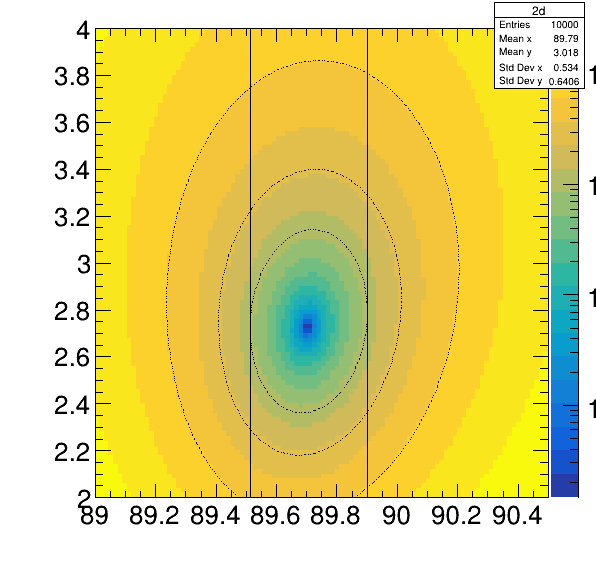

In [9]:
h2d = ROOT.TH2F("2d", "2d", 100, 89., 90.5, 100, 2., 4.)
for i in range(1,h2d.GetXaxis().GetNbins()+1):
  for j in range(1,h2d.GetYaxis().GetNbins()+1):
    m0here    = h2d.GetXaxis().GetBinCenter(i)
    gammaHere = h2d.GetYaxis().GetBinCenter(j)
    m0fit.setVal(m0here)
    Gammafit.setVal(gammaHere)
    h2d.SetBinContent(i, j, 2*(nll.getVal()-minNLL))

contours = array.array('d', [1, 2.41,5.99])
h2d.Draw("COLZ")
h2dclone = h2d.Clone()
h2dclone.SetContour(3, contours)
h2dclone.SetLineStyle(2)
h2dclone.Draw("CONT2 LIST same")
ROOT.gPad.SetLogz()

line1 = ROOT.TLine(m0fitresDo, 2, m0fitresDo, 4)
line2 = ROOT.TLine(m0fitresUp, 2, m0fitresUp, 4)
line1.Draw("sames")
line2.Draw("sames")
ROOT.gPad.Update()

ROOT.gPad.Draw()

# create the profile likelihood in parameter mofit

0.0

[#1] INFO:Minization -- RooProfileLL::evaluate(nll_bwfit_bwData_Profile[m0fit]) Creating instance of MINUIT
[#1] INFO:Minization -- RooProfileLL::evaluate(nll_bwfit_bwData_Profile[m0fit]) determining minimum likelihood for current configurations w.r.t all observable
[#1] INFO:Minization -- RooProfileLL::evaluate(nll_bwfit_bwData_Profile[m0fit]) minimum found at (m0fit=89.7039)
..................................................................................

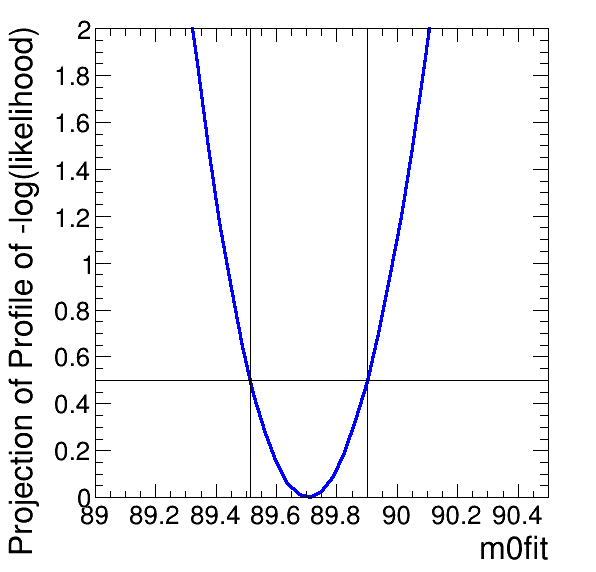

In [11]:
profile = nll.createProfile(m0fit)
frame1 = m0fit.frame(ROOT.RooFit.Bins(20), ROOT.RooFit.Range(89,90.5), ROOT.RooFit.Title("profileLL in mass"))
profile.plotOn(frame1)
frame1.GetYaxis().SetRangeUser(0, 2)
frame1.Draw()
line = ROOT.TLine(89, 0.5, 90.5, 0.5)
line.Draw("sames")
print(m0fit.getAsymErrorLo())
line1 = ROOT.TLine(m0fitresDo, 0, m0fitresDo, 2)
line2 = ROOT.TLine(m0fitresUp, 0, m0fitresUp, 2)
line1.Draw("sames")
line2.Draw("sames")
ROOT.gPad.Update()
ROOT.gPad.Draw()
